In [ ]:
#Step 1: data exploration 

In [2]:
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install sklearn
!pip install -U scikit-learn
!pip install xgboost scikit-learn


In [2]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [23]:
# how to read a CSV file:
df = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")


In [24]:
df.isnull().any().any() # check if we have nan values.

True

In [25]:
#Replace infinite or very large values with NaN

df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [26]:
#drop any instance that is missing a feture
df = df.dropna()
df.isnull().any().any() # check if we have nan values.

False

In [27]:
df.shape

(691406, 79)

In [28]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [29]:
# splitting to two new dfs, so we can explore each in their own:
non_benign_df = df[df[' Label'] != 'BENIGN']
benign_df = df[df[' Label'] == 'BENIGN']


In [30]:
benign_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [31]:
benign_df.shape

(439683, 79)

In [32]:
non_benign_df.shape

(251723, 79)

In [39]:
benign_df[' Flow Packets/s'].mean()

60813.25230407567

In [40]:
non_benign_df[' Flow Packets/s'].mean()

167435.11417550713

In [42]:
benign_df['Flow Bytes/s'].mean()

2433047.12992903

In [43]:
non_benign_df['Flow Bytes/s'].mean()

500709.4622361227

In [ ]:
benign_df[' Flow Duration'].mean()

<Axes: xlabel=' Packet Length Mean', ylabel=' Max Packet Length'>

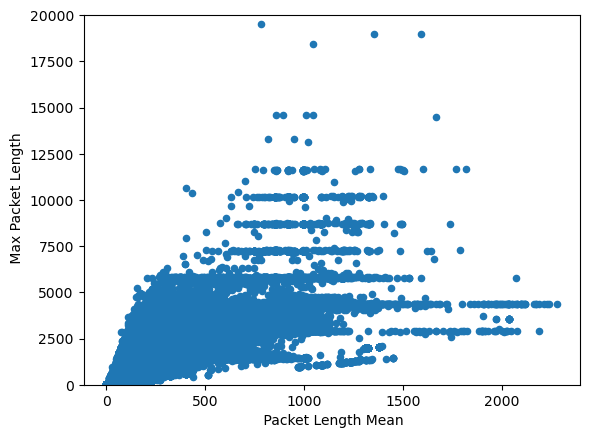

In [35]:
data = pd.concat([benign_df[' Max Packet Length'], benign_df[' Packet Length Mean']], axis=1)
data.plot.scatter(x=' Packet Length Mean', y=' Max Packet Length', ylim=(0,20000))

<Axes: xlabel=' Packet Length Mean', ylabel=' Max Packet Length'>

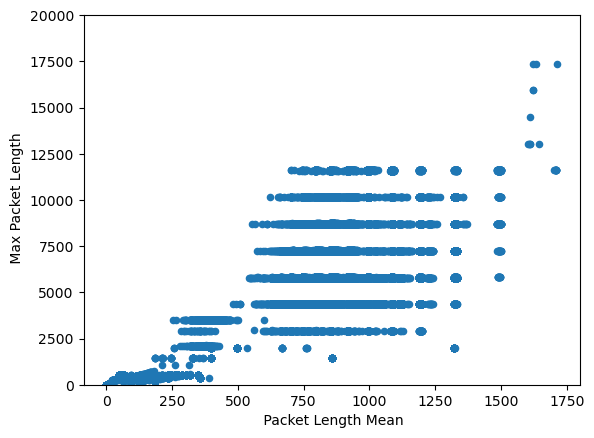

In [36]:
data = pd.concat([non_benign_df[' Max Packet Length'], non_benign_df[' Packet Length Mean']], axis=1)
data.plot.scatter(x=' Packet Length Mean', y=' Max Packet Length', ylim=(0,20000))

C:\Users\rator\AppData\Local\Temp\ipykernel_8676\1740716026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(benign_df[' Flow Duration'])


<Axes: xlabel=' Flow Duration', ylabel='Density'>

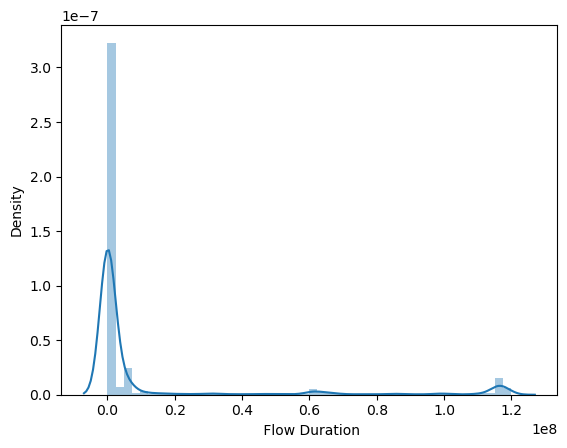

In [44]:
 sns.distplot(benign_df[' Flow Duration'])

C:\Users\rator\AppData\Local\Temp\ipykernel_8676\3100593492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_benign_df[' Flow Duration'])


<Axes: xlabel=' Flow Duration', ylabel='Density'>

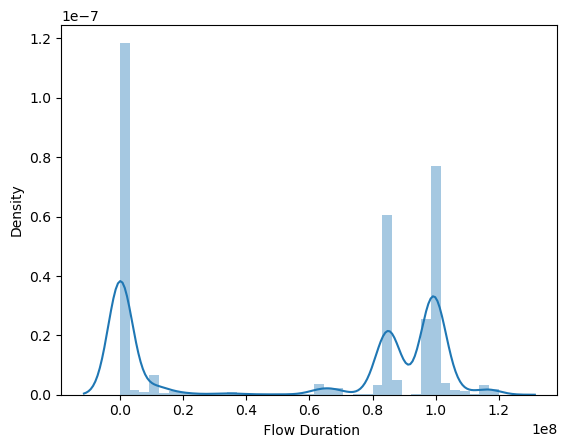

In [45]:
 sns.distplot(non_benign_df[' Flow Duration'])

C:\Users\rator\AppData\Local\Temp\ipykernel_8676\2031427950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(benign_df[' Packet Length Mean'])


<Axes: xlabel=' Packet Length Mean', ylabel='Density'>

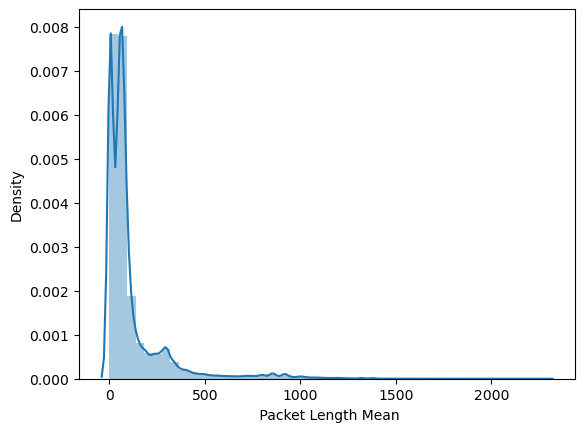

In [46]:
sns.distplot(benign_df[' Packet Length Mean'])

C:\Users\rator\AppData\Local\Temp\ipykernel_8676\1567781900.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_benign_df[' Packet Length Mean'])


<Axes: xlabel=' Packet Length Mean', ylabel='Density'>

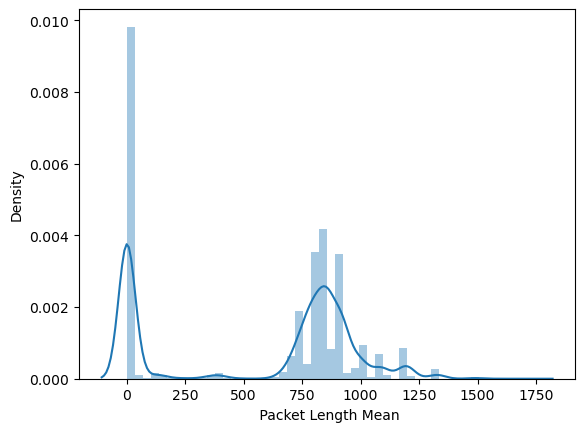

In [47]:
sns.distplot(non_benign_df[' Packet Length Mean'])

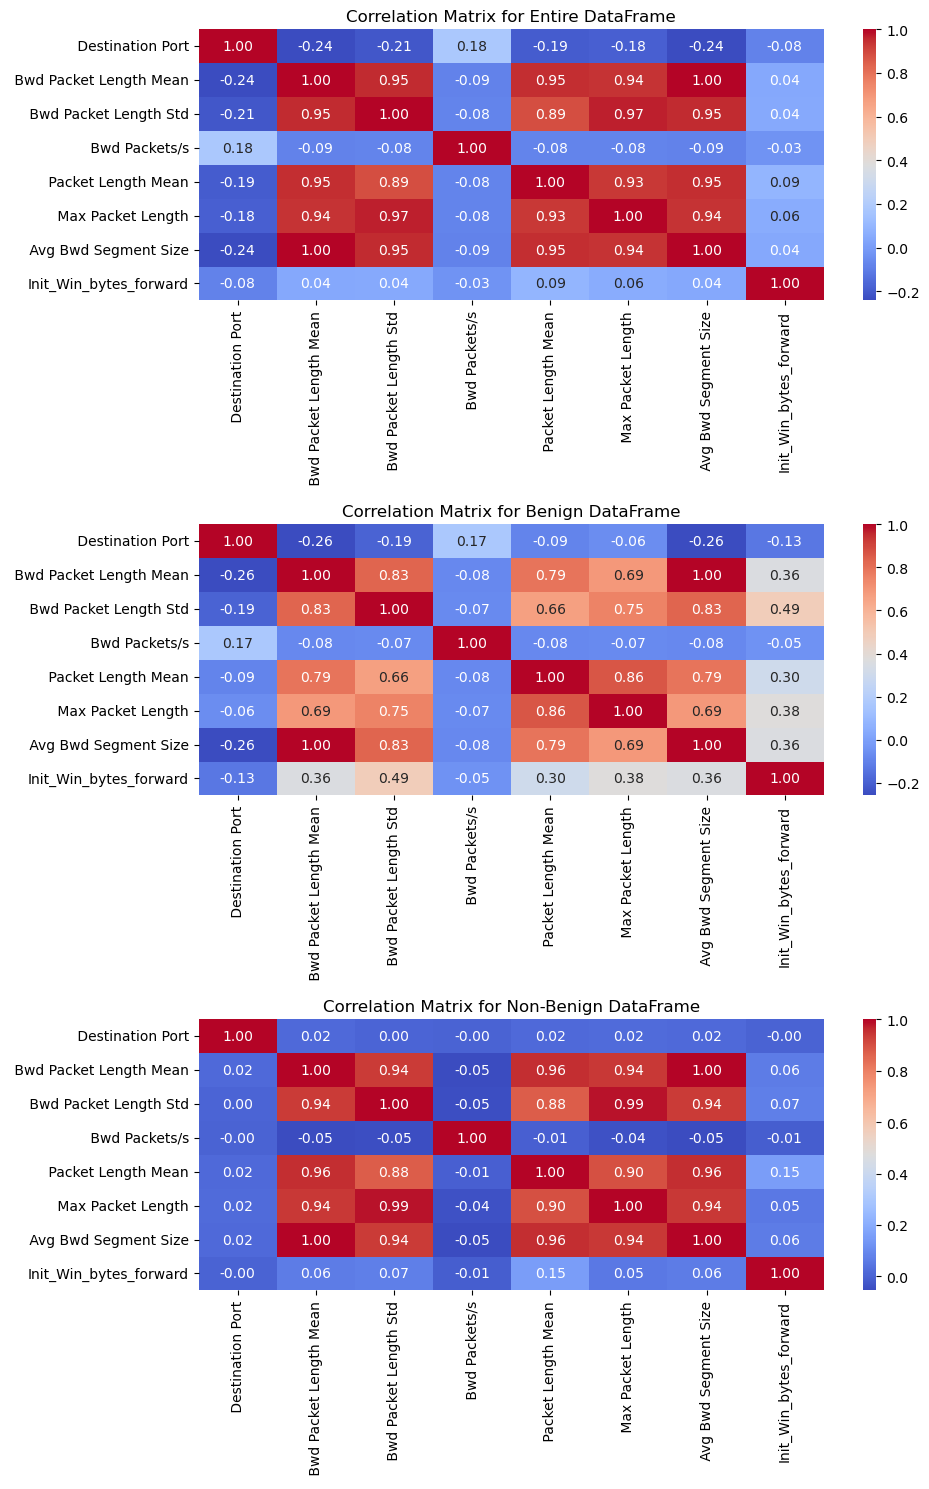

In [38]:
# Select the columns of interest (excluding the label column)
selected_columns = [' Destination Port', ' Bwd Packet Length Mean', ' Bwd Packet Length Std',
                    ' Bwd Packets/s', ' Packet Length Mean', ' Max Packet Length',
                    ' Avg Bwd Segment Size', 'Init_Win_bytes_forward']

# Create correlation matrices
corr_matrix_df = df[selected_columns].corr()
corr_matrix_benign = benign_df[selected_columns].corr()
corr_matrix_non_benign = non_benign_df[selected_columns].corr()

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Plot correlation matrix for the entire DataFrame
sns.heatmap(corr_matrix_df, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix for Entire DataFrame')

# Plot correlation matrix for benign DataFrame
sns.heatmap(corr_matrix_benign, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix for Benign DataFrame')

# Plot correlation matrix for non-benign DataFrame
sns.heatmap(corr_matrix_non_benign, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[2])
axes[2].set_title('Correlation Matrix for Non-Benign DataFrame')

# Adjust layout
plt.tight_layout()
plt.show()

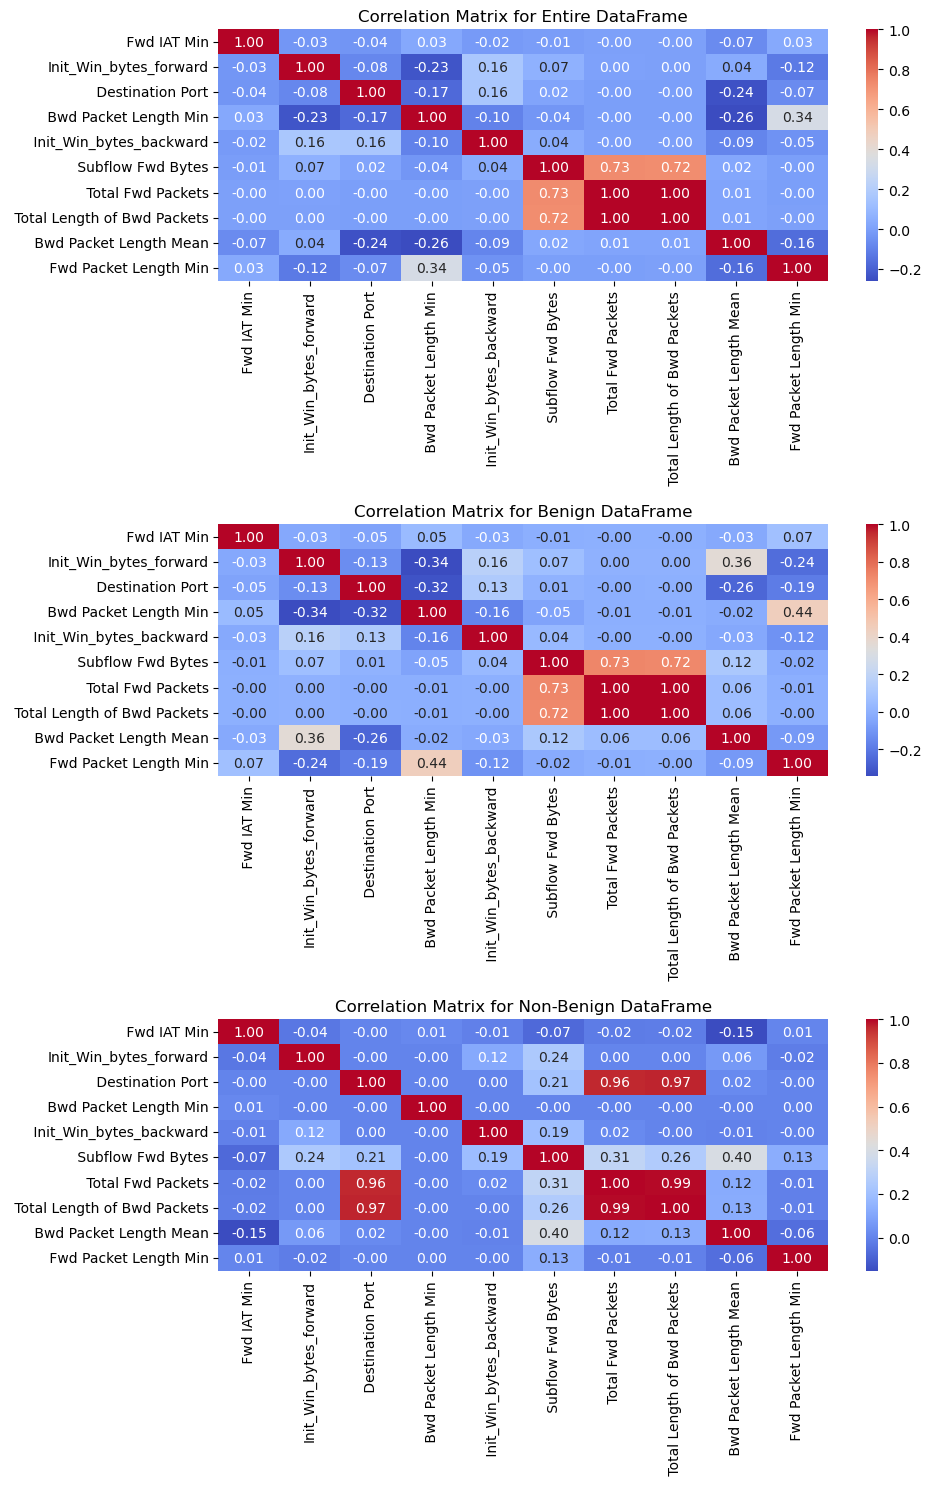

In [19]:
#NOW WITH OUR CHOSEN FEATURES:
# Select the columns of interest (excluding the label column)
selected_columns = [
    ' Fwd IAT Min',
    'Init_Win_bytes_forward',
    ' Destination Port',
    ' Bwd Packet Length Min',
    ' Init_Win_bytes_backward',
    ' Subflow Fwd Bytes',
    ' Total Fwd Packets',
    ' Total Length of Bwd Packets',
    ' Bwd Packet Length Mean',
    ' Fwd Packet Length Min'
]
# Create correlation matrices
corr_matrix_df = df[selected_columns].corr()
corr_matrix_benign = benign_df[selected_columns].corr()
corr_matrix_non_benign = non_benign_df[selected_columns].corr()

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Plot correlation matrix for the entire DataFrame
sns.heatmap(corr_matrix_df, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix for Entire DataFrame')

# Plot correlation matrix for benign DataFrame
sns.heatmap(corr_matrix_benign, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix for Benign DataFrame')

# Plot correlation matrix for non-benign DataFrame
sns.heatmap(corr_matrix_non_benign, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[2])
axes[2].set_title('Correlation Matrix for Non-Benign DataFrame')

# Adjust layout
plt.tight_layout()
plt.show()